# Simple Intro to Pandas

This tutrorial looks at the use of the popular python library Pandas. This is widely used to work with big datasets in ways which one can explore, clean, transformm and wrangle.  

**Tutorial Structure**
- [Preamble](#Preamble)
- [Import Data](#Import-Data)
 - [Creating DataFrames](#Creating-DataFrames)
 - [Read Files](#Read-Files)
- [A Look at the Data](#A-Look-at-the-Data)
 - [DataFrame Structure](#DataFrame-Structure)
 - [Maths & Statistics](#Maths-&-Statistics)
- [Filtering & Subsets](#Filtering-&-Subsets)
- [Data Wrangling](#Data-Wrangling)
 - [Cleaning](#Cleaning)
 - [Transformation](#Transformation)
- [Combining Data](#Combining-Data)
- [Working with...](#Workinh-with...)
 - [DateTime](#DateTime)
 - [Strings](#Strings)
- [Plotting](#Plotting)
 - [Pandas Plotting](#Pandas-Plotting)
 - [Plotting using MatplotLib](#Plotting-using-MatplotLib)
- [Export & Save](#Export-&-Save)
- [Additional Datasets](#Additional-Datasets)

# Preamble

In [2]:
%load_ext autoreload
%autoreload 2
# install im_tutorial package

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# numpy for mathematical functions
import numpy as np
# pandas for handling tabular data
import pandas as pd
# explained later
from im_tutorials.data.cordis import h2020_projects

# for plotting
import matplotlib.pyplot as plt

Matplotlib is building the font cache using fc-list. This may take a moment.


ModuleNotFoundError: No module named 'im_tutorials'

# Import Data

## Creating DataFrames

There are cases where you may hardcode for hacking-uses. This is one way to create a dataframe from scratch. Also, these will be used in examples throughout this tutorial.

In [ ]:
# useful for hacking
toy_1 = pd.DataFrame(
    {
        'col1' : ['a', 'b', np.nan,'c'],
        'col2' : ['d', 'e', 'f','g'],
        'col3' : [1, 2, 3, np.nan],
        'col4' : [4, 7, 6, 5]}
)

In [ ]:
toy_2= pd.DataFrame(
    {
        'col1': [10,20,30,40], 
        'col2': ['d', 'e', 'f', 'k'], 
        'col3': [5, 6, 7, 8],
        'col4': ['h', 'i', 'j', 'k']
    }
)

In [6]:
toy_1

,col1,col2,col3,col4
0,a,d,1.0,4
1,b,e,2.0,7
2,NaN,f,3.0,6
3,c,g,NaN,5


In [7]:
toy_2

,col1,col2,col3,col4
0,10,d,5,h
1,20,e,6,i
2,30,f,7,j
3,40,k,8,k


## Read Files

If you are working locally, you can pull files straight from disk into DataFrames with functions like

```python
df = pd.read_csv('path/to/file.csv')
```

Pandas can easily read csv, json, pickle files and more, even when they are compressed. It can also read directly from SQL databases with the `.read_sql` function.

In [ ]:
# maybe use cordis
cordis_projects_df = h2020_projects()

# A Look at the Data
<br/>
It is almost protocol to look at what's inside your dataset before you start to answer questions. Pandas allows us to easily explore and draw up basic analysis using some of the libraries methods and functions.

## DataFrame Structure

Before we start, it is import to note that Pandas deals with two types of data structures: the one-dimensional `Series` and the two-dimensional `DataFrame` In this tutprial, we will mainly work with dataframes. 

<img src="https://github.com/nestauk/im_tutorials/blob/master/reports/figures/base_01_pandas_5_0.png?raw=1">


**Head & Tail**
<br/>Sometimes, we want a peek at what is going inside. The functions `.head()` and `.tail()` displays the top n rows or last n rows, respectively. By default, the number of rows is set to `n = 5`. You can adjust the number of rows by simply changing the argument value.

In [9]:
cordis_projects_df.head(n=3)

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,projectUrl,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects,organisations,countries,startYear,endYear
0,218249,822106,WeldGalaxy,SIGNED,"[H2020-EU.2.1.3., H2020-EU.2.1.5.1.]",DT-NMBP-20-2018,H2020,Digital Dynamic Knowledge Platform for Welding...,2018-10-01,2022-03-31,NaN,"WeldGalaxy project will deliver, a B2B online ...",NaN,7500000.0,H2020-NMBP-PLUG-2018,IA-LS,TWI LIMITED,UK,"[LULEA TEKNISKA UNIVERSITET, ROMSOFT SRL, TECH...","[SE, RO, UK, NO, PL, FR, IL, ES]",NaN,"[TWI LIMITED, LULEA TEKNISKA UNIVERSITET, ROMS...","[UK, SE, RO, UK, NO, PL, FR, IL, ES]",2018.0,2022.0
1,218272,822064,MARKET4.0,SIGNED,"[H2020-EU.2.1.3., H2020-EU.2.1.5.1.]",DT-NMBP-20-2018,H2020,A Multi-Sided Business Platform for Plug and P...,2018-11-01,2022-04-30,NaN,"The objective of MARKET4.0 is to define, devel...",NaN,7500000.0,H2020-NMBP-PLUG-2018,IA-LS,INTRASOFT INTERNATIONAL SA,BE,"[N.BAZIGOS ABEE, NEDERLANDSE ORGANISATIE VOOR ...","[EL, NL, ES, DE, IT, FR, AT, LU, LT]",NaN,"[INTRASOFT INTERNATIONAL SA, N.BAZIGOS ABEE, N...","[BE, EL, NL, ES, DE, IT, FR, AT, LU, LT]",2018.0,2022.0
2,216937,816551,SCOPIO,SIGNED,"[H2020-EU.3., H2020-EU.2.3., H2020-EU.2.1.]",EIC-SMEInst-2018-2020,H2020,"High-resolution, all-digital microscope that a...",2018-05-01,2018-08-31,https://www.scopiolabs.com/,Scopio Labs aims to expand the use of Whole Sl...,71429.0,50000.0,H2020-SMEInst-2018-2020-1,SME-1,SCOPIO LABS LTD,IL,NaN,NaN,NaN,[SCOPIO LABS LTD],[IL],2018.0,2018.0


In [10]:
cordis_projects_df.tail(n=3)

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,projectUrl,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects,organisations,countries,startYear,endYear
20511,205207,695136,Secret-Cells,SIGNED,[H2020-EU.1.1.],ERC-ADG-2015,H2020,Cellular diversity and stress-induced cell-sta...,2016-09-01,2021-08-31,NaN,The hypothalamus is an essential interface amo...,2422698.0,2422698.0,ERC-2015-AdG,ERC-ADG,MEDIZINISCHE UNIVERSITAET WIEN,AT,NaN,NaN,NaN,[MEDIZINISCHE UNIVERSITAET WIEN],[AT],2016.0,2021.0
20512,205186,682022,MEDIATE,SIGNED,[H2020-EU.1.1.],ERC-CoG-2015,H2020,"Middlebrow Enlightenment: Disseminating Ideas,...",2016-09-01,2021-08-31,NaN,Intellectual history has long focused on a sma...,1998125.0,1998125.0,ERC-2015-CoG,ERC-COG,STICHTING KATHOLIEKE UNIVERSITEIT,NL,NaN,NaN,NaN,[STICHTING KATHOLIEKE UNIVERSITEIT],[NL],2016.0,2021.0
20513,205195,693039,Sphingolead,SIGNED,[H2020-EU.1.1.],ERC-PoC-2015,H2020,Development of a potent dual GCS/GBA2 inhibito...,2016-09-01,2018-02-28,NaN,Gaucher disease (GD) is an autosomal recessive...,150000.0,150000.0,ERC-2015-PoC,ERC-POC,UNIVERSITEIT LEIDEN,NL,NaN,NaN,NaN,[UNIVERSITEIT LEIDEN],[NL],2016.0,2018.0


**Indexes & Columns**
<br/>As seen above, dataframes are a tabilar data structire consiting of rows and columns. Indexes are used to identifyu rows whislt columns are identified by the column names. Both are appendable. 

In [11]:
cordis_projects_df.index

RangeIndex(start=0, stop=20514, step=1)

In [12]:
cordis_projects_df.columns

Index(['rcn', 'id', 'acronym', 'status', 'programme', 'topics',
       'frameworkProgramme', 'title', 'startDate', 'endDate', 'projectUrl',
       'objective', 'totalCost', 'ecMaxContribution', 'call', 'fundingScheme',
       'coordinator', 'coordinatorCountry', 'participants',
       'participantCountries', 'subjects', 'organisations', 'countries',
       'startYear', 'endYear'],
      dtype='object')

![Texte alternatif…](https://)We can also look at the `shape` of the dataframe which shows how many rows and columns are in the dataframe.

In [13]:
cordis_projects_df.shape

(20514, 25)

**Axis 0 or 1?**
<br/>There are cases where you may want to apply some calculations across rows or columns. This can be appoached by using the `axis` of the dataframe. This can be accessed using the `axis` parameter found in many methods (many are `axis = 0` but default). A few examples will be shown throughout this tutorial.
- Axis 0- apply on all rows across each column
- Axis 1- apply on all columns across each row

<img src="https://github.com/nestauk/im_tutorials/blob/master/reports/figures/axis.png?raw=1">


**DataTypes**
<br/>It's possible to check what datatypes are in each field. 
<br/> __Note__: Pandas tend to assign a column's datatype as `object` when non-numerical exists inside the field.

In [14]:
cordis_projects_df.dtypes

rcn                              int64
id                               int64
acronym                         object
status                          object
programme                       object
topics                          object
frameworkProgramme              object
title                           object
startDate               datetime64[ns]
endDate                 datetime64[ns]
projectUrl                      object
objective                       object
totalCost                      float64
ecMaxContribution              float64
call                            object
fundingScheme                   object
coordinator                     object
coordinatorCountry              object
participants                    object
participantCountries            object
subjects                       float64
organisations                   object
countries                       object
startYear                      float64
endYear                        float64
dtype: object

**Selecting**
<br/> Can select rows and columns.

In [15]:
#can look at columns separtely 
cordis_projects_df['call']

0                 H2020-NMBP-PLUG-2018
1                 H2020-NMBP-PLUG-2018
2            H2020-SMEInst-2018-2020-1
3             H2020-IBA-SC6-Nexus-2017
4           H2020-IBA-SC6-AUSTRIA-2018
5        H2020-IBA-SC6-Industrial-2017
6            H2020-SMEInst-2018-2020-1
7            H2020-SMEInst-2018-2020-1
8                     H2020-ICT-2016-2
9                    H2020-FETHPC-2017
10                  H2020-MSCA-IF-2016
11           H2020-SMEINST-1-2016-2017
12           H2020-SMEINST-2-2016-2017
13           H2020-SMEINST-2-2016-2017
14           H2020-SMEINST-2-2016-2017
15           H2020-SMEINST-2-2016-2017
16           H2020-SMEINST-2-2016-2017
17           H2020-SMEINST-2-2016-2017
18                    H2020-ICT-2016-2
19           H2020-SMEINST-2-2016-2017
20                    H2020-ICT-2016-2
21           H2020-SMEINST-2-2016-2017
22               H2020-FTIPilot-2016-1
23           H2020-SMEINST-2-2016-2017
24                  H2020-MSCA-IF-2016
25           H2020-SMEINS

In [16]:
#or a list of columns
cordis_projects_df[['status', 'coordinatorCountry']]

,status,coordinatorCountry
0,SIGNED,UK
1,SIGNED,BE
2,SIGNED,IL
3,SIGNED,FR
4,SIGNED,AT
5,SIGNED,BE
6,SIGNED,SE
7,SIGNED,DK
8,SIGNED,ES
9,SIGNED,ES


In [17]:
#selecting rows
cordis_projects_df[cordis_projects_df.index == 0]

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,projectUrl,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects,organisations,countries,startYear,endYear
0,218249,822106,WeldGalaxy,SIGNED,"[H2020-EU.2.1.3., H2020-EU.2.1.5.1.]",DT-NMBP-20-2018,H2020,Digital Dynamic Knowledge Platform for Welding...,2018-10-01,2022-03-31,NaN,"WeldGalaxy project will deliver, a B2B online ...",NaN,7500000.0,H2020-NMBP-PLUG-2018,IA-LS,TWI LIMITED,UK,"[LULEA TEKNISKA UNIVERSITET, ROMSOFT SRL, TECH...","[SE, RO, UK, NO, PL, FR, IL, ES]",NaN,"[TWI LIMITED, LULEA TEKNISKA UNIVERSITET, ROMS...","[UK, SE, RO, UK, NO, PL, FR, IL, ES]",2018.0,2022.0


We can also see the amount of unique elements in a field by using the `value_counts()` function.

In [22]:
cordis_projects_df['topics'].value_counts()

MSCA-IF-2017                    1335
MSCA-IF-2016                    1252
MSCA-IF-2014-EF                 1215
MSCA-IF-2015-EF                 1073
EIC-SMEInst-2018-2020            648
ERC-2017-STG                     406
ERC-2016-STG                     391
ERC-StG-2014                     374
ERC-CoG-2014                     369
ERC-StG-2015                     349
SMEInst-01-2016-2017             327
ERC-2017-COG                     326
ERC-2016-COG                     314
ERC-CoG-2015                     303
ERC-ADG-2015                     277
SMEInst-10-2016-2017             269
ERC-2017-ADG                     257
SMEInst-09-2016-2017             238
ERC-2016-ADG                     231
ERC-2018-STG                     192
ERC-ADG-2014                     190
ERC-PoC-2015                     160
ERC-2017-PoC                     160
ERC-PoC-2016                     159
SMEInst-02-2016-2017             156
SMEInst-07-2016-2017             154
SMEInst-11-2016-2017             152
M

## Maths & Statistics

**Arithmetic**

Here, we will use the toy example dataframes to show the operations at work.

In [23]:
toy_1

,col1,col2,col3,col4
0,a,d,1.0,4
1,b,e,2.0,7
2,NaN,f,3.0,6
3,c,g,NaN,5


In [24]:
toy_2

,col1,col2,col3,col4
0,10,d,5,h
1,20,e,6,i
2,30,f,7,j
3,40,k,8,k


- **Addition, Subtraction & More**

Although can use the standard pythonic way, Pandas provides functions to do the exact same job. <br/>
Note: the columns are chosen since both consist of integers.

In [25]:
#pythonic way 
toy_1['col4'] + toy_2['col1']

0    14
1    27
2    36
3    45
dtype: int64

In [26]:
#pandas fucntion 
toy_1['col4'].add(toy_2['col1'])

0    14
1    27
2    36
3    45
dtype: int64

** **texte en gras**_Task_** 
<br/>Try the arithmetic functions `subtract()`, `multiply()`, `divide()`, `floordiv()`, `mod()`, `pow()`

*Hint* You can see the documentation for any Python function or class from a notebook by simple appending `??` to the function call, e.g.

```python
toy_1['col1'].add??
```

In [31]:
toy_1['col4'].mod(toy_2['col1'])


0    4
1    7
2    6
3    5
dtype: int64

**_Task_**
<br/>Try the equivalent pythonic way of the above functions (`-`, `*`, `/`, `//`, `%`, `**`)

In [ ]:
# write code here


**Additional Functions**

In [32]:
#addition of elements across all rows (deafult axis = 0)
toy_1.sum()

col3     6.0
col4    22.0
dtype: float64

In [33]:
#addition of element across all columns
toy_1.sum(axis=1)

0    5.0
1    9.0
2    9.0
3    5.0
dtype: float64

In [34]:
# count of number of elements present in columns
cordis_projects_df.count()

rcn                     20514
id                      20514
acronym                 20514
status                  20514
programme               20514
topics                  20514
frameworkProgramme      20514
title                   20514
startDate               20509
endDate                 20484
projectUrl               6862
objective               20514
totalCost               20510
ecMaxContribution       20514
call                    20514
fundingScheme           20514
coordinator             20514
coordinatorCountry      20514
participants             7224
participantCountries     7224
subjects                    0
organisations           20514
countries               20514
startYear               20509
endYear                 20484
dtype: int64

In [35]:
# remember, you can find the result for a single column
cordis_projects_df['projectUrl'].count()

6862

**Statistics**

In [36]:
# only on numerical columns
cordis_projects_df.describe()

,rcn,id,totalCost,ecMaxContribution,subjects,startYear,endYear
count,20514.000000,20514.000000,2.051000e+04,2.051400e+04,0.0,20509.000000,20484.000000
mean,205906.043239,723884.919567,2.160951e+06,1.753137e+06,NaN,2016.554586,2019.157489
std,7667.617833,59853.745619,8.184743e+06,4.476247e+06,NaN,1.227849,2.033407
min,193157.000000,115797.000000,3.937500e+03,3.150000e+03,NaN,2014.000000,2014.000000
25%,198780.250000,677020.750000,1.677497e+05,1.661568e+05,NaN,2016.000000,2018.000000
50%,206398.500000,725068.500000,9.960281e+05,8.927629e+05,NaN,2017.000000,2019.000000
75%,212442.750000,770838.000000,2.416451e+06,2.135801e+06,NaN,2018.000000,2021.000000
max,218837.000000,831743.000000,8.569619e+08,4.408000e+08,NaN,2020.000000,2025.000000


**CAUTION!** <br/>
Use these functions with caution. Some fields are includ data such as IDs or serial numbers but are taken into account when drawing up analysis. It's up to the user to carefully decipher what makes sense. 

In [37]:
#or can separately get this results
cordis_projects_df[['totalCost', 'ecMaxContribution']].mean()

totalCost            2.160951e+06
ecMaxContribution    1.753137e+06
dtype: float64

**_Task_**
<br/>Now try other methods such as `min()`, `max()`, `median()`, `var()`, `std()` and  `quantile()`.

In [41]:
#print(cordis_projects_df[['rcn', 'ecMaxContribution']].min())
#print(cordis_projects_df[['rcn', 'ecMaxContribution']].max())
[cordis_projects_df[['rcn', 'ecMaxContribution']].max(), cordis_projects_df[['rcn', 'ecMaxContribution']].min()]

[rcn                     218837.0
 ecMaxContribution    440800000.0
 dtype: float64, rcn                  193157.0
 ecMaxContribution      3150.0
 dtype: float64]

#### Assigning Values to Variables

You don't have to just print values to screen, you can assign results of calculations to variables for furher computation.

In [ ]:
t = cordis_projects_df['totalCost']
m = t.mean()

In [43]:
m

2160950.7064147666

# Filtering & Subsets

There are multiple ways to create subsets of an existing dataframes. We can either use the `iloc` & `loc` conventions or directly using a boolean condition as an index.

In [44]:
# getting the subset of where the condition is true 
cordis_projects_df[cordis_projects_df['coordinatorCountry'] == 'UK'].head()

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,projectUrl,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects,organisations,countries,startYear,endYear
0,218249,822106,WeldGalaxy,SIGNED,"[H2020-EU.2.1.3., H2020-EU.2.1.5.1.]",DT-NMBP-20-2018,H2020,Digital Dynamic Knowledge Platform for Welding...,2018-10-01,2022-03-31,NaN,"WeldGalaxy project will deliver, a B2B online ...",NaN,7500000.0,H2020-NMBP-PLUG-2018,IA-LS,TWI LIMITED,UK,"[LULEA TEKNISKA UNIVERSITET, ROMSOFT SRL, TECH...","[SE, RO, UK, NO, PL, FR, IL, ES]",NaN,"[TWI LIMITED, LULEA TEKNISKA UNIVERSITET, ROMS...","[UK, SE, RO, UK, NO, PL, FR, IL, ES]",2018.0,2022.0
22,210626,755667,BreathSpec,SIGNED,"[H2020-EU.3., H2020-EU.2.]",FTIPilot-01-2016,H2020,"A rapid, non-invasive, cost-effective, analyti...",2017-05-01,2019-04-30,https://breathspec.com/,The world faces a growing epidemic of antimicr...,3323172.5,2367647.5,H2020-FTIPilot-2016-1,IA,IMSPEX DIAGNOSTICS LIMITED,UK,"[REDKNIGHT CONSULTANCY LTD, THE UNIVERSITY OF ...","[UK, IE, DE]",NaN,"[IMSPEX DIAGNOSTICS LIMITED, REDKNIGHT CONSULT...","[UK, UK, IE, DE]",2017.0,2019.0
24,208925,747461,Robust OTFT sensors,SIGNED,[H2020-EU.1.3.2.],MSCA-IF-2016,H2020,"Ultra-robust, flexible organic sensors for app...",2017-07-01,2019-06-30,https://www.oe.phy.cam.ac.uk,The overall objective of âRobust OTFT sensor...,171792.6,171792.6,H2020-MSCA-IF-2016,MSCA-IF-GF,THE CHANCELLOR MASTERS AND SCHOLARS OF THE UNI...,UK,NaN,NaN,NaN,[THE CHANCELLOR MASTERS AND SCHOLARS OF THE UN...,[UK],2017.0,2019.0
28,208684,750294,NAPANODE,TERMINATED,[H2020-EU.1.3.2.],MSCA-IF-2016,H2020,Molecular Foundation of Structural and Dynamic...,2017-03-01,2019-02-28,NaN,The future of widespread clean energy relies h...,183454.8,183454.8,H2020-MSCA-IF-2016,MSCA-IF-EF-ST,THE CHANCELLOR MASTERS AND SCHOLARS OF THE UNI...,UK,NaN,NaN,NaN,[THE CHANCELLOR MASTERS AND SCHOLARS OF THE UN...,[UK],2017.0,2019.0
30,208574,745808,BCSC-ST,TERMINATED,[H2020-EU.1.3.2.],MSCA-IF-2016,H2020,Breast cancer stem-like cells specific vulnera...,2017-03-01,2019-02-28,https://www.ncl.ac.uk/medicalsciences/contact/...,Breast cancer is the most common cause of fema...,195454.8,195454.8,H2020-MSCA-IF-2016,MSCA-IF-EF-RI,UNIVERSITY OF NEWCASTLE UPON TYNE,UK,NaN,NaN,NaN,[UNIVERSITY OF NEWCASTLE UPON TYNE],[UK],2017.0,2019.0


**Subsetting with `iloc` and `loc`**

<br/>Both functions can be used to create subsets. However, there are difference between the two. 
<br/>
`iloc` - Uses the _positional_ index for each row
<br/>
`loc` - Uses the index _values_

In [45]:
#up to top 3 rows (shows rows 0,1,2)
cordis_projects_df.iloc[:3]

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,projectUrl,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects,organisations,countries,startYear,endYear
0,218249,822106,WeldGalaxy,SIGNED,"[H2020-EU.2.1.3., H2020-EU.2.1.5.1.]",DT-NMBP-20-2018,H2020,Digital Dynamic Knowledge Platform for Welding...,2018-10-01,2022-03-31,NaN,"WeldGalaxy project will deliver, a B2B online ...",NaN,7500000.0,H2020-NMBP-PLUG-2018,IA-LS,TWI LIMITED,UK,"[LULEA TEKNISKA UNIVERSITET, ROMSOFT SRL, TECH...","[SE, RO, UK, NO, PL, FR, IL, ES]",NaN,"[TWI LIMITED, LULEA TEKNISKA UNIVERSITET, ROMS...","[UK, SE, RO, UK, NO, PL, FR, IL, ES]",2018.0,2022.0
1,218272,822064,MARKET4.0,SIGNED,"[H2020-EU.2.1.3., H2020-EU.2.1.5.1.]",DT-NMBP-20-2018,H2020,A Multi-Sided Business Platform for Plug and P...,2018-11-01,2022-04-30,NaN,"The objective of MARKET4.0 is to define, devel...",NaN,7500000.0,H2020-NMBP-PLUG-2018,IA-LS,INTRASOFT INTERNATIONAL SA,BE,"[N.BAZIGOS ABEE, NEDERLANDSE ORGANISATIE VOOR ...","[EL, NL, ES, DE, IT, FR, AT, LU, LT]",NaN,"[INTRASOFT INTERNATIONAL SA, N.BAZIGOS ABEE, N...","[BE, EL, NL, ES, DE, IT, FR, AT, LU, LT]",2018.0,2022.0
2,216937,816551,SCOPIO,SIGNED,"[H2020-EU.3., H2020-EU.2.3., H2020-EU.2.1.]",EIC-SMEInst-2018-2020,H2020,"High-resolution, all-digital microscope that a...",2018-05-01,2018-08-31,https://www.scopiolabs.com/,Scopio Labs aims to expand the use of Whole Sl...,71429.0,50000.0,H2020-SMEInst-2018-2020-1,SME-1,SCOPIO LABS LTD,IL,NaN,NaN,NaN,[SCOPIO LABS LTD],[IL],2018.0,2018.0


In [46]:
#up to index '3' (shows rows 0,1,2,3)
cordis_projects_df.loc[:3]

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,projectUrl,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects,organisations,countries,startYear,endYear
0,218249,822106,WeldGalaxy,SIGNED,"[H2020-EU.2.1.3., H2020-EU.2.1.5.1.]",DT-NMBP-20-2018,H2020,Digital Dynamic Knowledge Platform for Welding...,2018-10-01,2022-03-31,NaN,"WeldGalaxy project will deliver, a B2B online ...",NaN,7500000.0,H2020-NMBP-PLUG-2018,IA-LS,TWI LIMITED,UK,"[LULEA TEKNISKA UNIVERSITET, ROMSOFT SRL, TECH...","[SE, RO, UK, NO, PL, FR, IL, ES]",NaN,"[TWI LIMITED, LULEA TEKNISKA UNIVERSITET, ROMS...","[UK, SE, RO, UK, NO, PL, FR, IL, ES]",2018.0,2022.0
1,218272,822064,MARKET4.0,SIGNED,"[H2020-EU.2.1.3., H2020-EU.2.1.5.1.]",DT-NMBP-20-2018,H2020,A Multi-Sided Business Platform for Plug and P...,2018-11-01,2022-04-30,NaN,"The objective of MARKET4.0 is to define, devel...",NaN,7500000.0,H2020-NMBP-PLUG-2018,IA-LS,INTRASOFT INTERNATIONAL SA,BE,"[N.BAZIGOS ABEE, NEDERLANDSE ORGANISATIE VOOR ...","[EL, NL, ES, DE, IT, FR, AT, LU, LT]",NaN,"[INTRASOFT INTERNATIONAL SA, N.BAZIGOS ABEE, N...","[BE, EL, NL, ES, DE, IT, FR, AT, LU, LT]",2018.0,2022.0
2,216937,816551,SCOPIO,SIGNED,"[H2020-EU.3., H2020-EU.2.3., H2020-EU.2.1.]",EIC-SMEInst-2018-2020,H2020,"High-resolution, all-digital microscope that a...",2018-05-01,2018-08-31,https://www.scopiolabs.com/,Scopio Labs aims to expand the use of Whole Sl...,71429.00,50000.0,H2020-SMEInst-2018-2020-1,SME-1,SCOPIO LABS LTD,IL,NaN,NaN,NaN,[SCOPIO LABS LTD],[IL],2018.0,2018.0
3,218836,811181,MapProdIGI,SIGNED,[H2020-EU.3.6.2.1.],IBA-SC6-Nexus-2017,H2020,Microdata analysis for Policies for Productivi...,2018-07-01,2021-06-30,NaN,This project is part of efforts to go beyond t...,1657057.49,900000.0,H2020-IBA-SC6-Nexus-2017,CSA,ORGANISATION FOR ECONOMIC CO-OPERATION AND DEV...,FR,NaN,NaN,NaN,[ORGANISATION FOR ECONOMIC CO-OPERATION AND DE...,[FR],2018.0,2021.0


In [47]:
#4th and 7th in position
cordis_projects_df.iloc[[4,7]]

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,projectUrl,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects,organisations,countries,startYear,endYear
4,218837,814729,SSH Impact,SIGNED,[H2020-EU.3.6.2.1.],IBA-SC6-AUSTRIA-2018,H2020,Conference on the âImpact of Social Sciences...,2018-03-01,2019-02-28,NaN,The overall mission of the Austrian EU Council...,199950.0,199950.0,H2020-IBA-SC6-AUSTRIA-2018,CSA,ZENTRUM FUR SOZIALE INNOVATION GMBH,AT,NaN,NaN,NaN,[ZENTRUM FUR SOZIALE INNOVATION GMBH],[AT],2018.0,2019.0
7,217626,815751,SIWI,SIGNED,"[H2020-EU.3., H2020-EU.2.3., H2020-EU.2.1.]",EIC-SMEInst-2018-2020,H2020,Automatic Hitching for total Safety of Farmers...,2018-05-01,2018-08-31,http://www.siwimaskiner.dk/,Modern farm tractors provide most of the muscl...,71429.0,50000.0,H2020-SMEInst-2018-2020-1,SME-1,SIWI MASKINER APS,DK,NaN,NaN,NaN,[SIWI MASKINER APS],[DK],2018.0,2018.0


With toy data and non-numeric indexes:

In [50]:
toy_3 = toy_1.set_index('col2')
toy_3

,col1,col3,col4
col2,,,
d,a,1.0,4
e,b,2.0,7
f,NaN,3.0,6
g,c,NaN,5


In [49]:
toy_3.iloc[:2]

,col1,col3,col4
col2,,,
d,a,1.0,4
e,b,2.0,7


In [51]:
toy_3.loc[['d', 'f']]

,col1,col3,col4
col2,,,
d,a,1.0,4
f,NaN,3.0,6


# Data Wrangling

## Cleaning

**Dropping Data** 
<br/> 

In [52]:
# drop columns (a list of column names or single!)
toy_1.drop(['col1'], axis=1)

,col2,col3,col4
0,d,1.0,4
1,e,2.0,7
2,f,3.0,6
3,g,NaN,5


In [53]:
# drop rows 
toy_1.drop([1,2], axis=0) #inplace=True,

,col1,col2,col3,col4
0,a,d,1.0,4
3,c,g,NaN,5


Can also drop rows by setting a field as the index column and droppping the "UK" indices.

In [54]:
cord_2 = cordis_projects_df.set_index('coordinatorCountry')
cord_2.drop("UK", axis=0)

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,projectUrl,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,participants,participantCountries,subjects,organisations,countries,startYear,endYear
coordinatorCountry,,,,,,,,,,,,,,,,,,,,,,,,
BE,218272,822064,MARKET4.0,SIGNED,"[H2020-EU.2.1.3., H2020-EU.2.1.5.1.]",DT-NMBP-20-2018,H2020,A Multi-Sided Business Platform for Plug and P...,2018-11-01,2022-04-30,NaN,"The objective of MARKET4.0 is to define, devel...",NaN,7500000.00,H2020-NMBP-PLUG-2018,IA-LS,INTRASOFT INTERNATIONAL SA,"[N.BAZIGOS ABEE, NEDERLANDSE ORGANISATIE VOOR ...","[EL, NL, ES, DE, IT, FR, AT, LU, LT]",NaN,"[INTRASOFT INTERNATIONAL SA, N.BAZIGOS ABEE, N...","[BE, EL, NL, ES, DE, IT, FR, AT, LU, LT]",2018.0,2022.0
IL,216937,816551,SCOPIO,SIGNED,"[H2020-EU.3., H2020-EU.2.3., H2020-EU.2.1.]",EIC-SMEInst-2018-2020,H2020,"High-resolution, all-digital microscope that a...",2018-05-01,2018-08-31,https://www.scopiolabs.com/,Scopio Labs aims to expand the use of Whole Sl...,71429.00,50000.00,H2020-SMEInst-2018-2020-1,SME-1,SCOPIO LABS LTD,NaN,NaN,NaN,[SCOPIO LABS LTD],[IL],2018.0,2018.0
FR,218836,811181,MapProdIGI,SIGNED,[H2020-EU.3.6.2.1.],IBA-SC6-Nexus-2017,H2020,Microdata analysis for Policies for Productivi...,2018-07-01,2021-06-30,NaN,This project is part of efforts to go beyond t...,1657057.49,900000.00,H2020-IBA-SC6-Nexus-2017,CSA,ORGANISATION FOR ECONOMIC CO-OPERATION AND DEV...,NaN,NaN,NaN,[ORGANISATION FOR ECONOMIC CO-OPERATION AND DE...,[FR],2018.0,2021.0
AT,218837,814729,SSH Impact,SIGNED,[H2020-EU.3.6.2.1.],IBA-SC6-AUSTRIA-2018,H2020,Conference on the âImpact of Social Sciences...,2018-03-01,2019-02-28,NaN,The overall mission of the Austrian EU Council...,199950.00,199950.00,H2020-IBA-SC6-AUSTRIA-2018,CSA,ZENTRUM FUR SOZIALE INNOVATION GMBH,NaN,NaN,NaN,[ZENTRUM FUR SOZIALE INNOVATION GMBH],[AT],2018.0,2019.0
BE,218833,811163,GLORIA,SIGNED,[H2020-EU.3.6.2.1.],IBA-SC6-Industrial-2017,H2020,Global Industrial Research & Innovation Analyses,2018-06-01,2020-11-30,NaN,GLORIA provides evidence to support the EU and...,2350000.00,2345000.00,H2020-IBA-SC6-Industrial-2017,CSA,JRC -JOINT RESEARCH CENTRE- EUROPEAN COMMISSION,NaN,NaN,NaN,[JRC -JOINT RESEARCH CENTRE- EUROPEAN COMMISSION],[BE],2018.0,2020.0
SE,217710,816708,Biopsy X,SIGNED,"[H2020-EU.3., H2020-EU.2.3., H2020-EU.2.1.]",EIC-SMEInst-2018-2020,H2020,EndodrillÂ® Model X - a new endoscopic biopsy ...,2018-03-01,2018-08-31,https://www.bibbinstruments.com/,The overall objective of this 6-month Phase 1 ...,71429.00,50000.00,H2020-SMEInst-2018-2020-1,SME-1,BIBBINSTRUMENTS AB,NaN,NaN,NaN,[BIBBINSTRUMENTS AB],[SE],2018.0,2018.0
DK,217626,815751,SIWI,SIGNED,"[H2020-EU.3., H2020-EU.2.3., H2020-EU.2.1.]",EIC-SMEInst-2018-2020,H2020,Automatic Hitching for total Safety of Farmers...,2018-05-01,2018-08-31,http://www.siwimaskiner.dk/,Modern farm tractors provide most of the muscl...,71429.00,50000.00,H2020-SMEInst-2018-2020-1,SME-1,SIWI MASKINER APS,NaN,NaN,NaN,[SIWI MASKINER APS],[DK],2018.0,2018.0
ES,211066,761508,5GCITY,SIGNED,[H2020-EU.2.1.1.],ICT-08-2017,H2020,5GCITY,2017-06-01,2019-11-30,https://www.5gcity.eu,Delivering on the 5G promise of increased data...,7813007.00,6072367.40,H2020-ICT-2016-2,IA,"FUNDACIO PRIVADA I2CAT, INTERNET I INNOVACIO D...",[COMUNICARE DIGITALE - ASSOCIAZIONEDI PROMOZIO...,"[IT, ES, FR, BE, DE, UK, LU, PT]",NaN,"[FUNDACIO PRIVADA I2CAT, INTERNET I INNOVACIO ...","[ES, IT, ES, FR, BE, DE, UK, LU, PT]",2017.0,2019.0
ES,215832,801051,EPEEC,SIGNED,[H2020-EU.1.2.2.],FETHPC-02-2017,H2020,European joint Effort toward a Highly Producti...,2018-10-01,2021-09-30,NaN,EPEECâs main goal is to develop and deploy a...,3990708.75,3990708.75,H2020-FETHPC-2017,RIA,BARCELONA SUPERCOMPUTING CENTER - CENTRO NACIO...,[INSTITUT NATIONAL DE RECHERCHE ENINFORMATIQUE...,"[FR, SE, DE, BE, ES, PT, IT]",NaN,[BARCELONA SUPERCOMPUTING CENTER - CENTRO NACI...,"[ES, FR, SE, DE, BE, ES, PT, IT]",2018.0,2021.0


**Note**: when wrangling data, we can use the `inplace=True` argument in a function to avoid having to manually replace the dataframe variable. 
<br/>
<br/> For example, `toy_1.drop(['col1'], axis=1, inplace= True)` instead of `toy_1 = toy_1.drop(['col1'], axis=1)` 

**Handling Missing Data**

In [55]:
# returns a boolean dataframe
cordis_projects_df.isnull()

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,projectUrl,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects,organisations,countries,startYear,endYear
0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


This is a bit hard to understand. Let's see how many `True` values there are in each column by _chaining_ `.isnull` with `.sum`.

In [56]:
cordis_projects_df.isnull().sum()

rcn                         0
id                          0
acronym                     0
status                      0
programme                   0
topics                      0
frameworkProgramme          0
title                       0
startDate                   5
endDate                    30
projectUrl              13652
objective                   0
totalCost                   4
ecMaxContribution           0
call                        0
fundingScheme               0
coordinator                 0
coordinatorCountry          0
participants            13290
participantCountries    13290
subjects                20514
organisations               0
countries                   0
startYear                   5
endYear                    30
dtype: int64

In [57]:
# returns a subset of the dataframe where the boolean expression is true
cordis_projects_df[cordis_projects_df['participants'].isnull() == True].head()

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,projectUrl,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects,organisations,countries,startYear,endYear
2,216937,816551,SCOPIO,SIGNED,"[H2020-EU.3., H2020-EU.2.3., H2020-EU.2.1.]",EIC-SMEInst-2018-2020,H2020,"High-resolution, all-digital microscope that a...",2018-05-01,2018-08-31,https://www.scopiolabs.com/,Scopio Labs aims to expand the use of Whole Sl...,71429.00,50000.0,H2020-SMEInst-2018-2020-1,SME-1,SCOPIO LABS LTD,IL,NaN,NaN,NaN,[SCOPIO LABS LTD],[IL],2018.0,2018.0
3,218836,811181,MapProdIGI,SIGNED,[H2020-EU.3.6.2.1.],IBA-SC6-Nexus-2017,H2020,Microdata analysis for Policies for Productivi...,2018-07-01,2021-06-30,NaN,This project is part of efforts to go beyond t...,1657057.49,900000.0,H2020-IBA-SC6-Nexus-2017,CSA,ORGANISATION FOR ECONOMIC CO-OPERATION AND DEV...,FR,NaN,NaN,NaN,[ORGANISATION FOR ECONOMIC CO-OPERATION AND DE...,[FR],2018.0,2021.0
4,218837,814729,SSH Impact,SIGNED,[H2020-EU.3.6.2.1.],IBA-SC6-AUSTRIA-2018,H2020,Conference on the âImpact of Social Sciences...,2018-03-01,2019-02-28,NaN,The overall mission of the Austrian EU Council...,199950.00,199950.0,H2020-IBA-SC6-AUSTRIA-2018,CSA,ZENTRUM FUR SOZIALE INNOVATION GMBH,AT,NaN,NaN,NaN,[ZENTRUM FUR SOZIALE INNOVATION GMBH],[AT],2018.0,2019.0
5,218833,811163,GLORIA,SIGNED,[H2020-EU.3.6.2.1.],IBA-SC6-Industrial-2017,H2020,Global Industrial Research & Innovation Analyses,2018-06-01,2020-11-30,NaN,GLORIA provides evidence to support the EU and...,2350000.00,2345000.0,H2020-IBA-SC6-Industrial-2017,CSA,JRC -JOINT RESEARCH CENTRE- EUROPEAN COMMISSION,BE,NaN,NaN,NaN,[JRC -JOINT RESEARCH CENTRE- EUROPEAN COMMISSION],[BE],2018.0,2020.0
6,217710,816708,Biopsy X,SIGNED,"[H2020-EU.3., H2020-EU.2.3., H2020-EU.2.1.]",EIC-SMEInst-2018-2020,H2020,EndodrillÂ® Model X - a new endoscopic biopsy ...,2018-03-01,2018-08-31,https://www.bibbinstruments.com/,The overall objective of this 6-month Phase 1 ...,71429.00,50000.0,H2020-SMEInst-2018-2020-1,SME-1,BIBBINSTRUMENTS AB,SE,NaN,NaN,NaN,[BIBBINSTRUMENTS AB],[SE],2018.0,2018.0


Here, we will use another toy example. This is to show what will happen when we have columns or rows full of missing data.

In [58]:
toy_3 = pd.DataFrame(
        {
            'col_1': [np.nan, np.nan, np.nan, np.nan],
            'col_2': [2, 5, 6, 5],
            'col_3': [3, 6, np.nan, 6],
            'col_4': [3, 6, np.nan, 6],
        }
)
toy_3

,col_1,col_2,col_3,col_4
0,NaN,2,3.0,3.0
1,NaN,5,6.0,6.0
2,NaN,6,NaN,NaN
3,NaN,5,6.0,6.0


One way to drop rows/columns with missing data missing data is to use `dropna`. The `how = 'any'` parameter in the function sets the function to remove any rows/columns that include any missing values.

In [59]:
# here axis =0 by default
toy_3.dropna(how='any')

,col_1,col_2,col_3,col_4


In [61]:
# drop columns with missing values
toy_3.dropna(how='any', axis = 1)

,col_2
0,2
1,5
2,6
3,5


**_Task_**
<br/>There is another `how` parameter option. See what happens when `how` equals `all` (apply `axis= 0 and 1` here too).

In [63]:
toy_3.dropna(how='all', axis = 0)

,col_1,col_2,col_3,col_4
0,NaN,2,3.0,3.0
1,NaN,5,6.0,6.0
2,NaN,6,NaN,NaN
3,NaN,5,6.0,6.0


**Duplicates & Drop Duplicates**

In [64]:
toy_3.duplicated()

0    False
1    False
2    False
3     True
dtype: bool

In [65]:
toy_3.drop_duplicates()

,col_1,col_2,col_3,col_4
0,NaN,2,3.0,3.0
1,NaN,5,6.0,6.0
2,NaN,6,NaN,NaN


In [66]:
toy_3.T

,0,1,2,3
col_1,NaN,NaN,NaN,NaN
col_2,2.0,5.0,6.0,5.0
col_3,3.0,6.0,NaN,6.0
col_4,3.0,6.0,NaN,6.0


In [67]:
toy_3.T.duplicated()

col_1    False
col_2    False
col_3    False
col_4     True
dtype: bool

To drop duplicate columns, the duplicate functions do not have the `axis` parameter. Instead, __transposing__ the dataframe will help solve this. This will be touched on later.

**Replace**

<br/> `replace` is a useful function when dealing with data that may have used a placeholder value to represent missing values or to replace missing values with a value. Can also be used to replace strings.

In [68]:
toy_3.replace(np.nan, 0.0)
# (setting inplace=True makes permanent changes without having to replace the df)

,col_1,col_2,col_3,col_4
0,0.0,2,3.0,3.0
1,0.0,5,6.0,6.0
2,0.0,6,0.0,0.0
3,0.0,5,6.0,6.0


In [69]:
# to fill NaN values, there is also the specific fillna function
toy_3.fillna(0)

,col_1,col_2,col_3,col_4
0,0.0,2,3.0,3.0
1,0.0,5,6.0,6.0
2,0.0,6,0.0,0.0
3,0.0,5,6.0,6.0


**Rename & Resets**

In cases of dropping rows, this will not automatically reset the indexes. This is where `reset_index` comes in handy. 

In [70]:
toy_1.drop(1)

,col1,col2,col3,col4
0,a,d,1.0,4
2,NaN,f,3.0,6
3,c,g,NaN,5


In [71]:
toy_1.drop(1).reset_index() 

,index,col1,col2,col3,col4
0,0,a,d,1.0,4
1,2,NaN,f,3.0,6
2,3,c,g,NaN,5


In [72]:
# the drop parameter in reset_index deletes the original indexes
toy_1.drop(1).reset_index(drop=True) 

,col1,col2,col3,col4
0,a,d,1.0,4
1,NaN,f,3.0,6
2,c,g,NaN,5


**Sort**

In [73]:
toy_1.sort_values('col4')

,col1,col2,col3,col4
0,a,d,1.0,4
3,c,g,NaN,5
2,NaN,f,3.0,6
1,b,e,2.0,7


## Transformation

In [ ]:
# add new columns
#group data & apply a function & mergeb
#refer back to adat types and how we change datatype of column

**Transpose**
<br/> To invert the the dimensions of the dataframe. That is, the rows become columns and vice versa.

In [74]:
#transpose data

toy_3.T

,0,1,2,3
col_1,NaN,NaN,NaN,NaN
col_2,2.0,5.0,6.0,5.0
col_3,3.0,6.0,NaN,6.0
col_4,3.0,6.0,NaN,6.0


**_Task_**
<br/>Referring back to the duplicates section. Infer whether columns (rows when transposed) are duplicates and drop these columns.

**Mapping**

<br/>`map` is a function which helps in the case where we want to replace multiple values at the same time. In most cases, a dictionary is used.

In [ ]:
# returning back to this df
uk_fr_df = cordis_projects_df.loc[(cordis_projects_df['coordinatorCountry'] == 'UK') | 
                                  (cordis_projects_df['coordinatorCountry'] == 'FR')]

In [76]:
uk_fr_df.head()

,rcn,id,acronym,status,programme,topics,frameworkProgramme,title,startDate,endDate,projectUrl,objective,totalCost,ecMaxContribution,call,fundingScheme,coordinator,coordinatorCountry,participants,participantCountries,subjects,organisations,countries,startYear,endYear
0,218249,822106,WeldGalaxy,SIGNED,"[H2020-EU.2.1.3., H2020-EU.2.1.5.1.]",DT-NMBP-20-2018,H2020,Digital Dynamic Knowledge Platform for Welding...,2018-10-01,2022-03-31,NaN,"WeldGalaxy project will deliver, a B2B online ...",NaN,7500000.00,H2020-NMBP-PLUG-2018,IA-LS,TWI LIMITED,UK,"[LULEA TEKNISKA UNIVERSITET, ROMSOFT SRL, TECH...","[SE, RO, UK, NO, PL, FR, IL, ES]",NaN,"[TWI LIMITED, LULEA TEKNISKA UNIVERSITET, ROMS...","[UK, SE, RO, UK, NO, PL, FR, IL, ES]",2018.0,2022.0
3,218836,811181,MapProdIGI,SIGNED,[H2020-EU.3.6.2.1.],IBA-SC6-Nexus-2017,H2020,Microdata analysis for Policies for Productivi...,2018-07-01,2021-06-30,NaN,This project is part of efforts to go beyond t...,1657057.49,900000.00,H2020-IBA-SC6-Nexus-2017,CSA,ORGANISATION FOR ECONOMIC CO-OPERATION AND DEV...,FR,NaN,NaN,NaN,[ORGANISATION FOR ECONOMIC CO-OPERATION AND DE...,[FR],2018.0,2021.0
18,211070,761557,NGPaaS,SIGNED,[H2020-EU.2.1.1.],ICT-08-2017,H2020,Next Generation Platform as a Service,2017-06-01,2019-05-31,http://ngpaas.eu,Cloud innovations have had a major impact on t...,6646352.94,5214705.63,H2020-ICT-2016-2,IA,NOKIA BELL LABS FRANCE,FR,"[B-COM, ORANGE SA, INTERUNIVERSITAIR MICRO-ELE...","[FR, BE, ES, GI, DK, UK, IT, IL]",NaN,"[NOKIA BELL LABS FRANCE, B-COM, ORANGE SA, INT...","[FR, FR, BE, ES, GI, DK, UK, IT, IL]",2017.0,2019.0
22,210626,755667,BreathSpec,SIGNED,"[H2020-EU.3., H2020-EU.2.]",FTIPilot-01-2016,H2020,"A rapid, non-invasive, cost-effective, analyti...",2017-05-01,2019-04-30,https://breathspec.com/,The world faces a growing epidemic of antimicr...,3323172.50,2367647.50,H2020-FTIPilot-2016-1,IA,IMSPEX DIAGNOSTICS LIMITED,UK,"[REDKNIGHT CONSULTANCY LTD, THE UNIVERSITY OF ...","[UK, IE, DE]",NaN,"[IMSPEX DIAGNOSTICS LIMITED, REDKNIGHT CONSULT...","[UK, UK, IE, DE]",2017.0,2019.0
24,208925,747461,Robust OTFT sensors,SIGNED,[H2020-EU.1.3.2.],MSCA-IF-2016,H2020,"Ultra-robust, flexible organic sensors for app...",2017-07-01,2019-06-30,https://www.oe.phy.cam.ac.uk,The overall objective of âRobust OTFT sensor...,171792.60,171792.60,H2020-MSCA-IF-2016,MSCA-IF-GF,THE CHANCELLOR MASTERS AND SCHOLARS OF THE UNI...,UK,NaN,NaN,NaN,[THE CHANCELLOR MASTERS AND SCHOLARS OF THE UN...,[UK],2017.0,2019.0


In [ ]:
replace_dict = {
    'UK' : 'England, Scotland, Wales and NI',
    'FR' : 'France'
}

In [78]:
uk_fr_df['coordinatorCountry'].map(replace_dict).head()

0     England, Scotland, Wales and NI
3                              France
18                             France
22    England, Scotland, Wales and NI
24    England, Scotland, Wales and NI
Name: coordinatorCountry, dtype: object

**GroupBy**

<br/>The `groupby` function allows for one to perform calculations and analysis on split or "grouped" data. 

In [79]:
# returns a generator
cordis_projects_df.groupby(by=['status'])

Here, we can investigate statistical results of each numerical column based on the groups defined by applying the methods form earlier.

In [80]:
cordis_projects_df.groupby(by=['status']).mean()

,rcn,id,totalCost,ecMaxContribution,subjects,startYear,endYear
status,,,,,,,
CLOSED,200358.081405,692498.117318,4.378749e+05,3.389019e+05,NaN,2015.541101,2016.671189
SIGNED,206384.141832,726695.553194,2.313069e+06,1.877964e+06,NaN,2016.633702,2019.344723
TERMINATED,201289.196388,693269.027088,5.741743e+05,4.507264e+05,NaN,2016.054795,2018.169492


In [81]:
cordis_projects_df.groupby(by=['status']).sum()

,rcn,id,totalCost,ecMaxContribution,subjects,startYear,endYear
status,,,,,,,
CLOSED,251048676,867700141,5.486573e+08,4.246441e+08,0.0,2525473.0,2526889.0
SIGNED,3883736781,13674956920,4.351808e+10,3.533953e+10,0.0,37949013.0,38000029.0
TERMINATED,89171114,307118179,2.543592e+08,1.996718e+08,0.0,883032.0,833504.0


# Combining Data
<br/>Combining data is important in cases where one may have multiple datasets. This is useful when enriching data.

**Merge**

<br/>In Pandas, there are various ways to merge: `left`, `right`, `inner`, `outer`. Here, we have to specify 

In [83]:
# merge - `left` specifies the first is the main dataframe and the other is mergeing with it 
# note, the columns must be the same in order for a smooth merge
#note the col chosen of the chosen df of is constant and everything is depent on that (Whether it includes the lement in it's respective row)
pd.merge(
    toy_1,
    toy_2,
    how='right', 
    on= 'col2'
)

,col1_x,col2,col3_x,col4_x,col1_y,col3_y,col4_y
0,a,d,1.0,4.0,10,5,h
1,b,e,2.0,7.0,20,6,i
2,NaN,f,3.0,6.0,30,7,j
3,NaN,k,NaN,NaN,40,8,k


**_Task_**
<br/>Now see what happens when the `how` parameter equals `right`, `inner` and `outer`.

In [ ]:
# write code here

**Concatenate**
<br/>Concatenating is another why of combining datasets which simply stacks two or more dataframes besides (across rows) or on-top of each other(across columns).

In [86]:
pd.concat([toy_1, toy_2], axis = 0) 

,col1,col2,col3,col4
0,a,d,1.0,4
1,b,e,2.0,7
2,NaN,f,3.0,6
3,c,g,NaN,5
0,10,d,5.0,h
1,20,e,6.0,i
2,30,f,7.0,j
3,40,k,8.0,k


**_Task_**
<br/>Now see what happens when `axis` is set to `1` in the function.

In [ ]:
# write code here

# Working with...

Here, we will look at different non-numeric data type and how we can work with them in pandas.

## DateTime
<br />
Luckily, the datetime fields in the Cordis dataset include datetime objects. In a lot of cases, datetime information are stored as strings. Thankfully, pandas can deal with this. These strings are transformed to datetime objects.

In [ ]:
toy_date_series = pd.Series(
        ['19-08-01', '16-05-18', '25-04-17']
)

In [88]:
toy_date_series

0    19-08-01
1    16-05-18
2    25-04-17
dtype: object

In [ ]:
toy_date_series_transformed = pd.to_datetime(toy_date_series)

In [90]:
toy_date_series_transformed

0   2001-08-19
1   2018-05-16
2   2017-04-25
dtype: datetime64[ns]

In [91]:
# for example, the first row 
print(toy_date_series_transformed[0].year)
print(toy_date_series_transformed[0].month)
print(toy_date_series_transformed[0].day)

2001
8
19


## Strings
<br/>When working with data, you will most likely come across strings. Pandas offers the `str()` function to deal with such. This function discards of `NaN` values. 

In [92]:
# apply lower case to all tokens
cordis_projects_df['title'].str.lower()

0        digital dynamic knowledge platform for welding...
1        a multi-sided business platform for plug and p...
2        high-resolution, all-digital microscope that a...
3        microdata analysis for policies for productivi...
4        conference on the âimpact of social sciences...
5         global industrial research & innovation analyses
6        endodrillâ® model x - a new endoscopic biopsy ...
7        automatic hitching for total safety of farmers...
8                                                   5gcity
9        european joint effort toward a highly producti...
10       functional exploration of the contributions of...
11       fast iot market take-up through the things net...
12       the most cost-efficient video ad creation plat...
13       affordable, accessible and automatic screening...
14       high-capacity and high-performance thermal ene...
15       securing water for food and safety with the wo...
16       siade saas: spatial decision support system fo.

In [93]:
# apply upper case to all tokens
cordis_projects_df['title'].str.upper()

0        DIGITAL DYNAMIC KNOWLEDGE PLATFORM FOR WELDING...
1        A MULTI-SIDED BUSINESS PLATFORM FOR PLUG AND P...
2        HIGH-RESOLUTION, ALL-DIGITAL MICROSCOPE THAT A...
3        MICRODATA ANALYSIS FOR POLICIES FOR PRODUCTIVI...
4        CONFERENCE ON THE ÂIMPACT OF SOCIAL SCIENCES...
5         GLOBAL INDUSTRIAL RESEARCH & INNOVATION ANALYSES
6        ENDODRILLÂ® MODEL X - A NEW ENDOSCOPIC BIOPSY ...
7        AUTOMATIC HITCHING FOR TOTAL SAFETY OF FARMERS...
8                                                   5GCITY
9        EUROPEAN JOINT EFFORT TOWARD A HIGHLY PRODUCTI...
10       FUNCTIONAL EXPLORATION OF THE CONTRIBUTIONS OF...
11       FAST IOT MARKET TAKE-UP THROUGH THE THINGS NET...
12       THE MOST COST-EFFICIENT VIDEO AD CREATION PLAT...
13       AFFORDABLE, ACCESSIBLE AND AUTOMATIC SCREENING...
14       HIGH-CAPACITY AND HIGH-PERFORMANCE THERMAL ENE...
15       SECURING WATER FOR FOOD AND SAFETY WITH THE WO...
16       SIADE SAAS: SPATIAL DECISION SUPPORT SYSTEM FO.

In [94]:
cordis_projects_df['title'].str.len().head()                

0     74
1     87
2    167
3     82
4    152
Name: title, dtype: int64

**_Task_**
<br/>See what happens when using the `split()` function

In [ ]:
# write code here


# Plotting

## Pandas Plotting
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

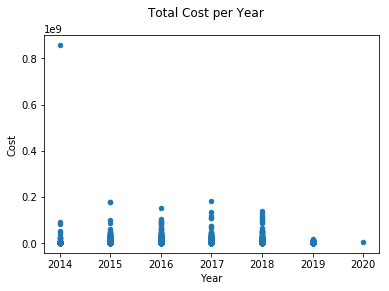

In [95]:
cordis_projects_df.plot(x ='startYear', y = 'totalCost', kind='scatter')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.suptitle('Total Cost per Year')
plt.show()

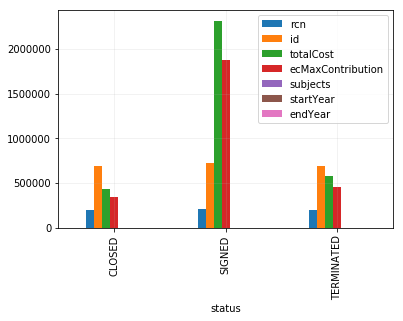

In [96]:
#using the groupby df
cordis_projects_df.groupby(by=['status']).mean().plot(kind='bar')
plt.grid(alpha=0.2)
plt.show()

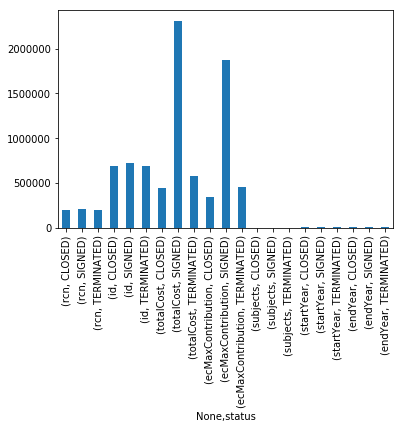

In [97]:
cordis_projects_df.groupby(by=['status']).mean().unstack(0).plot(kind='bar')
plt.show()

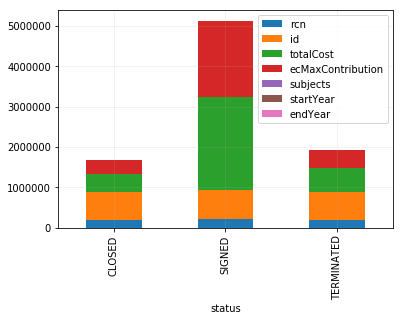

In [98]:
# can stack - quite hard to see the size of each column result, plus doesn't make sense in this case
cordis_projects_df.groupby(by=['status']).mean().plot(kind='bar', stacked=True)
plt.grid(alpha=0.2)

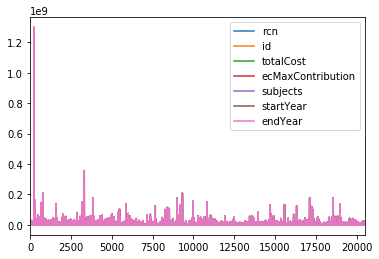

In [99]:
cordis_projects_df.plot(kind='line', stacked=True);

## Plotting using MatplotLib

https://matplotlib.org/3.1.1/contents.html

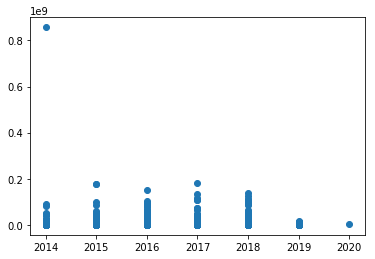

In [100]:
plt.scatter(cordis_projects_df['startYear'], cordis_projects_df['totalCost']);

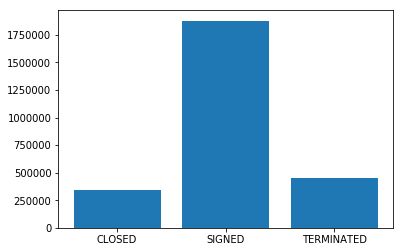

In [101]:
plt.bar(
    cordis_projects_df.groupby(by=['status']).mean()['ecMaxContribution'].index, 
    cordis_projects_df.groupby(by=['status']).mean()['ecMaxContribution'].values);

# Export & Save

<br/> During or after  analysis or wrangling, it's import to save the dataframe being worked on. There are many ways to save data. A common one is `.csv`. 

On a machine with access to local disk space you can use commands like

```python
df.to_csv('directory/to/file_name.csv')
# or without column names and indexes in the output
df.to_csv('/directory/to/file_name.csv', header=False, index=False) 
```

# Available Datasets

There are several datasets available from the Innovation Mapping repository. The can be accessed with simple convenience functions from the `im_tutorials` library.

## Data Dictionaries

There are data dictionaries on the `im_tutorial` repository, which can be found [here](https://github.com/nestauk/im_tutorials/tree/master/data).

There are typically two types of data loading functions in the library that either:

- Load one of a selection of relational datasets with a string argument
- Load a single dataset, typically a self-contained sample of data.

We have already seen the latter with the `h2020_projects` data so we will now look at an example of the former.

### Relational Datasets

Let's have a look at some data from CORDIS.

In [ ]:
from im_tutorials.data.cordis import cordis_table

![Texte alternatif…](https://)First, we will load some CORDIS organisations using the `cordis_table` function.

You can use the `??` notation to view which tables are available using the table function.

In [ ]:
cordis_table??

In [ ]:
cordis_orgs_df = cordis_table('organisations')

In [105]:
cordis_orgs_df.head()

,id,name,country_code,country_name
0,-99679701,BAE SYSTEMS (OPERATIONS) LIMITED,GB,United Kingdom
1,-99552481,Hanoi University of Technology,VN,Vietnam
2,-99525116,COSMOTE KINITES TILEPIKOINONIES AE,GR,Greece
3,-99524889,CONFEDERATION OF DANISH INDUSTRIES,DK,Denmark
4,-99449792,Swiss Air Ambulance LTD,CH,Switzerland


In [ ]:
cordis_project_orgs_df = cordis_table('project_organisations')

In [110]:
cordis_project_orgs_df.head()

,project_rcn,organization_id,activity_type,address,contribution,type,website
0,85231,999635926,Other,"{'city': 'TORINO', 'street': 'CORSO DUCA DEGLI...",306448,participant,www.corep.it
1,85231,999665802,Private for-profit entities (excluding Higher ...,"{'city': 'HOLTE', 'street': 'FREDERIKSLUNDSVEJ...",396542,coordinator,
2,85231,999904228,Higher or Secondary Education Establishments,"{'city': 'BUDAPEST', 'street': 'MUEGYETEM RAKP...",184575,participant,www.bme.hu
3,85231,999990655,Higher or Secondary Education Establishments,"{'city': 'KGS LYNGBY', 'street': 'ANKER ENGELU...",252520,participant,www.dtu.dk
4,85231,999992401,Research Organisations,"{'city': 'PARIS 15', 'street': 'RUE LEBLANC 2...",257924,participant,www.cea.fr


Now we can combine the two, due to their relational nature.

In [ ]:
cordis_project_orgs_df = cordis_project_orgs_df.merge(
    cordis_orgs_df, left_on='organization_id', right_on='id', how='left'
)

In [112]:
cordis_project_orgs_df.head()

,project_rcn,organization_id,activity_type,address,contribution,type,website,id,name,country_code,country_name
0,85231,999635926,Other,"{'city': 'TORINO', 'street': 'CORSO DUCA DEGLI...",306448,participant,www.corep.it,999635926,CONSORZIO PER LA RICERCA E L EDUCAZIONE PERMAN...,IT,Italy
1,85231,999665802,Private for-profit entities (excluding Higher ...,"{'city': 'HOLTE', 'street': 'FREDERIKSLUNDSVEJ...",396542,coordinator,,999665802,TECHNOCONSULT APS,DK,Denmark
2,85231,999904228,Higher or Secondary Education Establishments,"{'city': 'BUDAPEST', 'street': 'MUEGYETEM RAKP...",184575,participant,www.bme.hu,999904228,BUDAPESTI MUSZAKI ES GAZDASAGTUDOMANYI EGYETEM,HU,Hungary
3,85231,999990655,Higher or Secondary Education Establishments,"{'city': 'KGS LYNGBY', 'street': 'ANKER ENGELU...",252520,participant,www.dtu.dk,999990655,DANMARKS TEKNISKE UNIVERSITET,DK,Denmark
4,85231,999992401,Research Organisations,"{'city': 'PARIS 15', 'street': 'RUE LEBLANC 2...",257924,participant,www.cea.fr,999992401,COMMISSARIAT A L ENERGIE ATOMIQUE ET AUX ENERG...,FR,France


**Gateway to research**

In [ ]:
from im_tutorials.data.gtr import gtr_table
gtr_project_df = gtr_table('projects')

In [119]:
gtr_project_df.head()

,id,end,title,status,grantCategory,leadFunder,abstractText,start,created,leadOrganisationDepartment,potentialImpact,techAbstractText
0,00006CB7-61E0-4946-B7DB-DAE09ED63DE4,NaT,Construction Site Monitoring,Closed,Vouchers,Innovate UK,We take aerial photos of construction sites us...,NaT,2018-11-08 11:38:37,None,None,None
1,0003C360-5DB8-4930-8266-6218C633A504,NaT,The 'Authoritarian Turn' in Environmental Gove...,Active,Studentship,ESRC,This research will investigate the possibility...,NaT,2018-11-08 11:38:37,Architecture Planning and Landscape,None,None
2,000423DA-5A37-4E62-A698-703985CD4E6E,NaT,Proton-driven plasma wakefield acceleration---...,Closed,Research Grant,STFC,"Over the last fifty years, accelerators of eve...",NaT,2018-11-08 11:38:37,Physics and Astronomy,This project is naturally a multi-disciplinary...,None
3,000424B1-378E-4AB6-BAEC-CD8607AE08A9,NaT,Mechanisms mediating axon outgrowth in the Dro...,Closed,Research Grant,BBSRC,We are dependent on our nervous system functio...,NaT,2018-11-08 11:38:37,Developmental Neurobiology,The research in this proposal will have a numb...,The formation of the nervous system requires t...
4,0004C698-0B51-4665-8593-1082BBF58C06,NaT,"Ultrahigh resolution NMR: citius, altius, fortius",Active,Research Grant,EPSRC,Understanding the structures and behaviour of ...,NaT,2018-11-08 11:38:37,Chemistry,Who will benefit from this research?\n\nNMR is...,None
